In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import math
import numpy as np
import os

In [ ]:
def get_data(data_path):
    with open(data_path, 'r') as f:
        data_text = f.read().strip()

    data = np.array([[float(x) for x in row.split(',')] for row in data_text.split('\n')])
    features = data[:, :-1]
    y = data[:, -1]

    # add in our x0 feature
    X = np.concatenate((np.ones(len(features))[:, None], features), axis=1)

    return X, y


def plot_data(X, y):
    sns.regplot(X[:, 1], y, fit_reg=False)
    sns.plt.show()


def normal_equation(X, y):
    return np.linalg.pinv(X.T.dot(X)).dot(X.T.dot(y))


def gradient_descent(X, y, alpha=0.01):
    iterations = 0
    theta = np.zeros(X.shape[1])
    previous_cost = math.inf
    current_cost = cost_function(X, y, theta)
    all_costs = [current_cost]
    cont = True
    f, (ax1) = plt.subplots(1)

    while cont:
        iterations += 1
        theta = theta - (alpha / len(X)) * sum(X * (X.dot(theta)-y)[:, None])
        previous_cost = current_cost
        current_cost = cost_function(X, y, theta)
        all_costs.append(current_cost)
        
        if iterations % 1000 == 0:
            print('iteration #{}\ncurrent: {:+.4f}\tdiff_prev: {:+.4f}'.format(iterations, current_cost, current_cost-previous_cost))
            sns.regplot(np.array(range(len(all_costs))), np.array(all_costs), fit_reg=False)
            if input('continue? (y/n) ') == 'y':
                pass
            else:
                cont = False

    return theta


def cost_function(X, y, theta):
    m = len(y)

    return (1/(2*m)) * sum((X.dot(theta) - y)**2)


def linear_regression(X, y, method='normal_equation', **kwargs):
    if method=='normal_equation':
        return normal_equation(X, y)
    elif method=='gradient_descent':
        return gradient_descent(X, y, **kwargs)


class Normalizer:

    def __init__(self):
        self.X = None
        self.X_transformed = None
        self.X_mean = None
        self.X_stdev = None

    def fit(self, X):
        self.X = X
        self.X_mean = self.X.mean(axis=0)
        self.X_mean[0] = 0
        self.X_stdev = self.X.std(axis=0)
        self.X_stdev[0] = 1
        self.X_transformed = (self.X - self.X_mean) / self.X_stdev

    def fit_transform(self, X):
        self.fit(X)
        return self.X_transformed

    def get_transformed(self):
        return self.X_transformed
    
    def transform(self, X):
        return (X - self.X_mean) / self.X_stdev
    
    def unfit_theta(self, theta):
        """
        Converts the parameters from the normalized space back to the original space.
        
        Input: list theta
        Output: list
        
        This equation can be verified by looking at a normalized example [1, (x1 - x1_mean)/x1_std, (x2 - x2_mean)/x2_std, ...],
        multiplying this example by parameters [theta_0, theta_1, theta_2, ...] to get prediction y,
        and then rearranging terms to leave the individual x terms not normalized and all the constants grouped
        under a new theta_0.
        """
        theta_0 = theta[0] - sum(theta[1:]*self.X_mean[1:]/self.X_stdev[1:])
        theta_rest = theta[1:]/self.X_stdev[1:]
        return [theta_0, *theta_rest]

In [52]:
# Get data
data_paths = [os.path.join('ex1', 'ex1data1.txt'), os.path.join('ex1', 'ex1data2.txt')]
X1, y1 = get_data(data_paths[0])
X2, y2 = get_data(data_paths[1])

In [53]:
# Normal Equation for both data sets
theta1_normal_equation = linear_regression(X1, y1)
print(theta1_normal_equation)

theta2_normal_equation = linear_regression(X2, y2)
print(theta2_normal_equation)

[-3.89578088  1.19303364]
[ 89597.90954361    139.21067402  -8738.01911255]


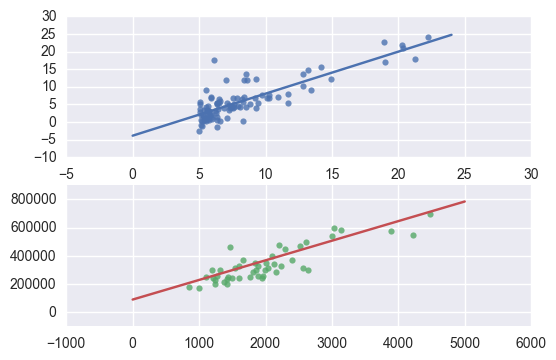

In [98]:
# Data plots with line of best fit as given by normal equation
f, (ax1, ax2) = plt.subplots(2)
sns.regplot(X1[:, 1], y1, fit_reg=False, ax=ax1)
th1n = theta1_normal_equation
th1plots = [th1n[0] + i*th1n[1] for i in range(25)]
ax1.plot(th1plots)

sns.regplot(X2[:, 1], y2, fit_reg=False, ax=ax2)
th2n = theta2_normal_equation
th2plots = [th2n[0] + i*th2n[1] for i in range(5000)]
ax2.plot(th2plots)

In [ ]:
# Gradient Descent for Data 1, no normalization
theta1_gradient_descent_no_norm = linear_regression(X1, y1, method='gradient_descent')
print(theta1_gradient_descent_no_norm)

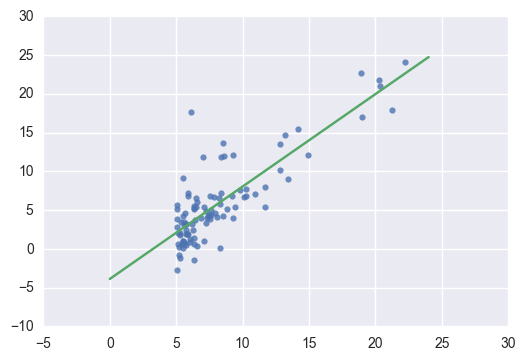

In [106]:
# Data 1 plot with line of best fit as given by gradient descent
f, (ax1) = plt.subplots(1)
sns.regplot(X1[:, 1], y1, fit_reg=False, ax=ax1)
th1g = theta1_gradient_descent_no_norm
th1gplots = [th1g[0] + i*th1g[1] for i in range(25)]
ax1.plot(th1gplots)

iteration #50000
current: +4.4770	diff_prev: +0.0000
continue? (y/n) n
[ 5.83913505  4.59304113]


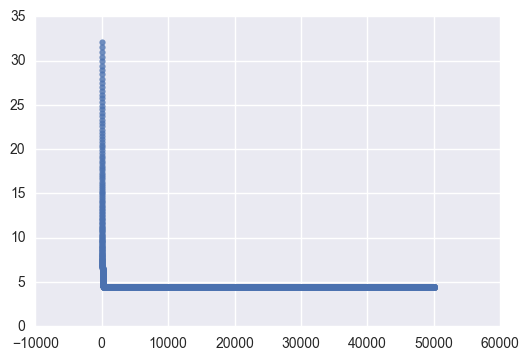

In [119]:
# Gradient Descent for Data 1, with normalization
X1_normalizer = Normalizer()
X1_normed = X1_normalizer.fit_transform(X1)
theta1_gradient_descent_with_norm = linear_regression(X1_normed, y1, method='gradient_descent')
print(theta1_gradient_descent_with_norm)

In [111]:
print(X1_normalizer.unfit_theta(theta1_gradient_descent_with_norm))

[-3.8957808783118058, 1.1930336441895824]


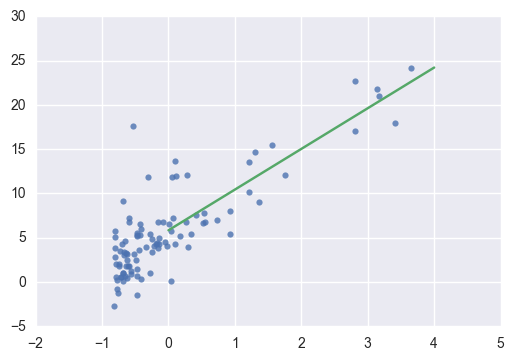

In [103]:
# Data 1 plot with line of best fit as given by gradient descent, with normalization
f, (ax1) = plt.subplots(1)
sns.regplot(X1_normed[:, 1], y1, fit_reg=False, ax=ax1)
th1gn = theta1_gradient_descent_with_norm
th1gnplots = [th1gn[0] + i*th1gn[1] for i in range(5)]
ax1.plot(th1gnplots)

iteration #50000
current: +2043280050.6028	diff_prev: +0.0000
continue? (y/n) n
[ 340412.65957447  109447.79646964   -6578.35485416]


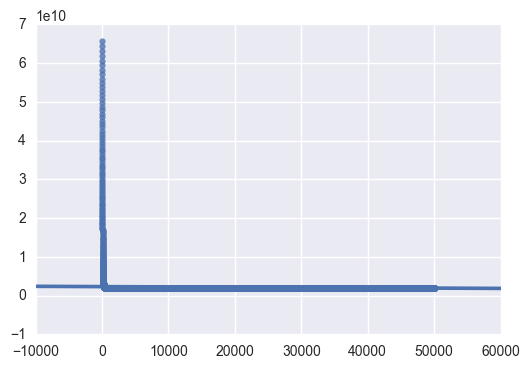

In [113]:
# Gradient Descent for Data 2, with normalization
X2_normalizer = Normalizer()
X2_normed = X2_normalizer.fit_transform(X2)
theta2_gradient_descent_with_norm = linear_regression(X2_normed, y2, method='gradient_descent')
print(theta2_gradient_descent_with_norm)

In [114]:
print(X2_normalizer.unfit_theta(theta2_gradient_descent_with_norm))

[89597.90954279463, 139.21067401762414, -8738.0191123269487]


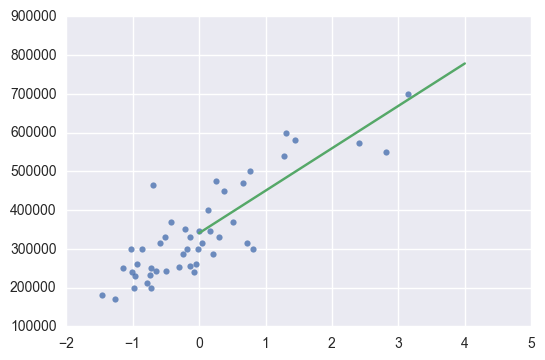

In [115]:
# Data 2 plot with line of best fit as given by gradient descent, with normalization
f, (ax1) = plt.subplots(1)
sns.regplot(X2_normed[:, 1], y2, fit_reg=False, ax=ax1)
th2gn = theta2_gradient_descent_with_norm
th2gnplots = [th2gn[0] + i*th2gn[1] for i in range(5)]
ax1.plot(th2gnplots)